### Reference from "https://qiita.com/mhangyo/items/f06debce3975a269a658"

In [1]:
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
import pygrib # import pygrib interface to grib_api
import pandas as pd
import os
import sys
import math

%matplotlib inline
os.system("wget -O Z__C_RJTD_20170102000000_MSM_GPV_Rjp_Lsurf_FH00-15_grib2.bin http://database.rish.kyoto-u.ac.jp/arch/jmadata/data/gpv/original/2017/01/02/Z__C_RJTD_20170102000000_MSM_GPV_Rjp_Lsurf_FH00-15_grib2.bin")

0

In [2]:
grbs = pygrib.open('Z__C_RJTD_20170102000000_MSM_GPV_Rjp_Lsurf_FH00-15_grib2.bin')

# selectメソッドで指定した要素(forecastTime=0)にマッチする要素の配列が返ってくる。
# forecastTime=0の要素は複数あるが先頭([0])は海面更生気圧(mslp)が入っている
grb = grbs.select(forecastTime=0)[0]

# lats,lonsは二次元配列で緯度経度が入っている
lats, lons = grb.latlons()

# 中に含まれているデータ(海面更生気圧)を二次元のndarrayで取り出す
mslp = grb.values


/home/yuichiro/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


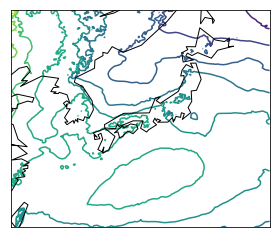

In [3]:
# 等圧線をひく間隔をlevelsにリストとして入れる
# MSLPの単位はPaなので、2hPaごとに線をひく場合、200おきに線をひくことになる。
levels = range(math.floor(mslp.min()/100)*100, math.ceil(mslp.max()/100)*100+1,200)

# lat,lonを一次元に変換
# 何故か二次元のままでは描画できない
flat_lats= np.ravel(lats)
flat_lons= np.ravel(lons)

fig = plt.figure()

# マップを作成。4つのパラメータは描画する範囲の指定
m = Basemap(llcrnrlat=lats.min(),urcrnrlat=lats.max(), llcrnrlon=lons.min(),urcrnrlon=lons.max())

# 等圧線をひく
m.contour(flat_lons, flat_lats,mslp,latlon=True,tri=True,levels=levels)

# 海岸線をひく
m.drawcoastlines() 

fig.show()